# CNN

In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from keras.layers import Dense
from keras.layers import Conv2D
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#x_train_flattened = X_train.reshape(len(X_train), 28*28)
#x_test_flattened = X_test.reshape(len(X_test), 28*28)

In [3]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [10]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0042 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0031 - accuracy: 0.9989
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0568 - accuracy: 0.9888


[0.05681672319769859, 0.9887999892234802]

In [12]:
y_predicted = model.predict(X_test)
y_predicted[0]
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 [==============================] - 2s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

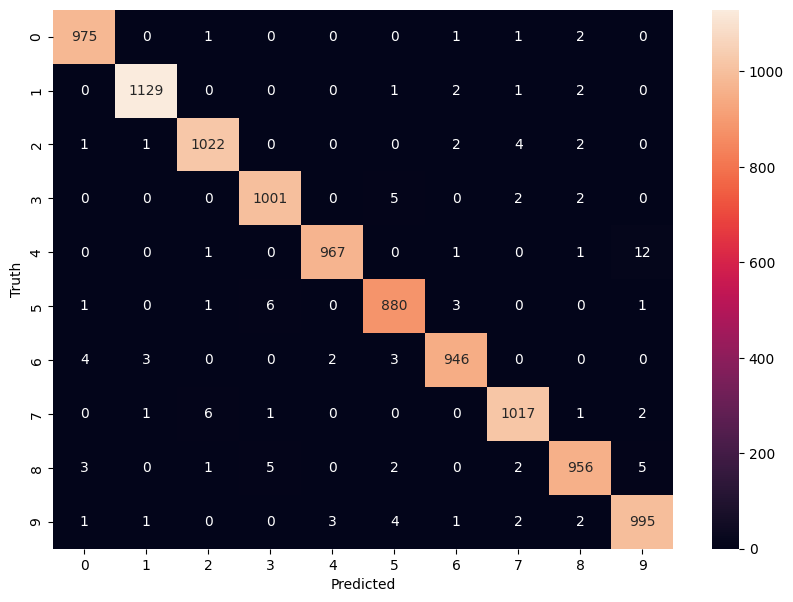

In [13]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')